## Observations and Insights

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset

In [2]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


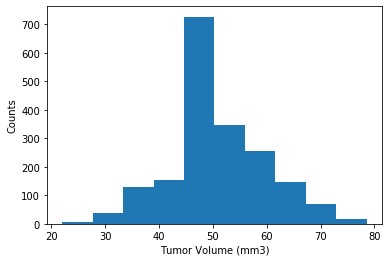

50.44838063133655
48.95147442
0    45.0
dtype: float64
NormaltestResult(statistic=0.40038259084770994, pvalue=0.8185741486108852)


In [4]:
plt.hist(study_results['Tumor Volume (mm3)'])
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Counts')
plt.show()
print(study_results['Tumor Volume (mm3)'].mean())
print(study_results['Tumor Volume (mm3)'].median())
print(study_results['Tumor Volume (mm3)'].mode())
print(st.normaltest(study_results['Tumor Volume (mm3)'].sample(100)))

In [5]:
# Merge our two data frames together
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Review the information on the newly created merged dataframe
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
Mouse ID              1893 non-null object
Drug Regimen          1893 non-null object
Sex                   1893 non-null object
Age_months            1893 non-null int64
Weight (g)            1893 non-null int64
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


## Summary statistics

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group_stats = combined_data.groupby('Drug Regimen').agg(\
        # Get the mean of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Mean=('Tumor Volume (mm3)', np.mean),\
        # Get the median of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Median=('Tumor Volume (mm3)', np.median),\
        # Get the variance of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Var=('Tumor Volume (mm3)', np.var),\
        # Get the standard deviation of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_Stdev=('Tumor Volume (mm3)', np.std),\
        # Get the standard error of measurement (SEM) of the 'Tumor Volume (mm3)' column\
        Tumor_Vol_SEM=('Tumor Volume (mm3)', st.sem)\
).round(3)

# Display the Summary statistics table grouped by 'Drug Regimen' column
drug_group_stats

,Tumor_Vol_Mean,Tumor_Vol_Median,Tumor_Vol_Var,Tumor_Vol_Stdev,Tumor_Vol_SEM
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.323,50.855,42.351,6.508,0.513
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar plots

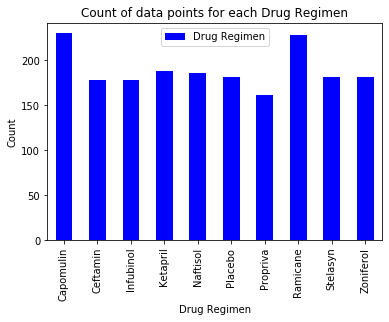

<Figure size 432x288 with 0 Axes>

In [82]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# First create a dataframe grouping by the 'Drug Regimen' column
drug_group = combined_data.groupby('Drug Regimen')

# Create a dataframe counting the number of data points for each Drug Regimen
drug_group_count = pd.DataFrame(drug_group['Drug Regimen'].count())


# Create a bar chart based off of the group series from before
count_chart = drug_group_count.plot(kind='bar', title="Count of data points for each Drug Regimen", color="blue")

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Count")


plt.show()
plt.tight_layout()

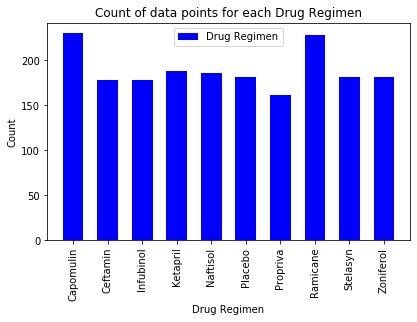

In [81]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Using the same groupby dataframe as above
# Set x axis and tick locations
x_axis = np.arange(len(drug_group_count))
tick_locations = [value for value in x_axis]

 # Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(6.5,4))
plt.bar(x_axis, drug_group_count["Drug Regimen"], color='blue', align="center", width = 0.6)
plt.xticks(tick_locations, list(drug_group_count.index), rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(drug_group_count["Drug Regimen"])*1.05)

# Set a Title and labels
plt.title("Count of data points for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")
# Set it to a "tight" layout
#plt.tight_layout()

Text(0, 0.5, 'Count')

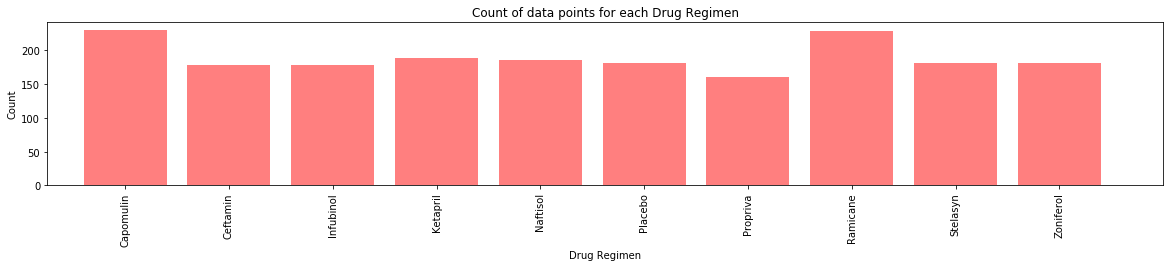

## Pie plots

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, outliers and boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and scatter plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [ ]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen